<a href="https://colab.research.google.com/github/RuwanthiLakshika/Classification-with-TensorFlow/blob/main/Classification_after_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download('https://raw.githubusercontent.com/RuwanthiLakshika/Classification-with-TensorFlow/main/dataset%20(1).csv')

8192it [00:00, 413803.24it/s]


In [4]:
data=pd.read_csv('/content/dataset%20(1).csv')

In [5]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [6]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [7]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [8]:
x=data.drop(['Sex'],axis=1)
y=data['Sex']

In [45]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x= pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [46]:
x.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [47]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [50]:
y=y.astype('int')

In [51]:
y.dtype

dtype('int64')

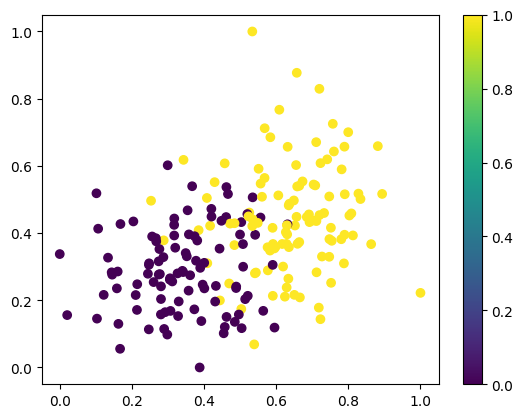

In [52]:
plt.scatter(x['Height'],x['Weight'],c=y)
plt.colorbar()
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.shape,x_test.shape

((164, 2), (41, 2))

In [55]:
data.shape

(205, 3)

# Model Building

In [57]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
             metrics = ["accuracy"])

# train the model
epoch_number = 20
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20
6/6 [==============================] - 1s 5ms/step - loss: 0.6947 - accuracy: 0.4756
Epoch 2/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5610
Epoch 3/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.6159
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.7805
Epoch 5/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.7866
Epoch 7/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6222 - accuracy: 0.8293
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.7988
Epoch 9/20
6/6 [==============================] - 0s 5ms/step - loss: 0.5526 - accuracy: 0.8415
Epoch 10/20
6/6 [==============================] - 0s 5ms/step - loss: 0.5219 - accuracy: 0.8537
Epoch 11/20
6/6 [======================

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Evaluate

In [59]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2805 - accuracy: 0.9024


[0.2805022597312927, 0.9024389982223511]

In [60]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [61]:
y_pred[:5]

array([[0.15692702],
       [0.94151676],
       [0.95383453],
       [0.33594012],
       [0.92301124]], dtype=float32)

In [62]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [63]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636364>

In [64]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [65]:
history.history

{'loss': [0.6946690082550049,
  0.6916713118553162,
  0.6889017820358276,
  0.681848406791687,
  0.6684200167655945,
  0.6473405957221985,
  0.6222397685050964,
  0.5925052165985107,
  0.5525853037834167,
  0.5218695402145386,
  0.48029765486717224,
  0.4401787519454956,
  0.41289520263671875,
  0.3756759464740753,
  0.3610025942325592,
  0.3315750062465668,
  0.3410417139530182,
  0.3126029670238495,
  0.3047027885913849,
  0.31423479318618774],
 'accuracy': [0.47560974955558777,
  0.5609756112098694,
  0.6158536672592163,
  0.7804877758026123,
  0.75,
  0.7865853905677795,
  0.8292682766914368,
  0.7987805008888245,
  0.8414633870124817,
  0.8536585569381714,
  0.8536585569381714,
  0.8536585569381714,
  0.8536585569381714,
  0.8597561120986938,
  0.8719512224197388,
  0.8536585569381714,
  0.8353658318519592,
  0.8841463327407837,
  0.8353658318519592,
  0.8475610017776489]}

<Axes: >

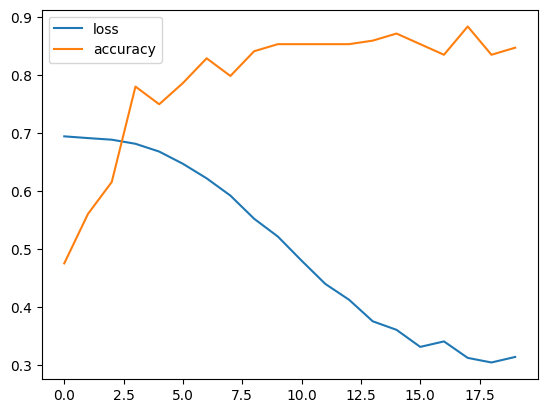

In [66]:
pd.DataFrame(history.history).plot()